# **Camera Calibration**

In [ ]:
import cv2
# import cv
import numpy as np
import matplotlib.pyplot as plt

### Load Image files and Intrinsic Camera Matrix

In [ ]:
# Load images im1 and im2
img1 = cv2.imread("/content/drive/MyDrive/auto_programing_assignment/im1.jpg" , 0)
img2 = cv2.imread("/content/drive/MyDrive/auto_programing_assignment/im2.jpg" , 0)

# Load intrinsic camera matrix 
Intrinsic_camera_matrix = np.loadtxt("/content/drive/MyDrive/auto_programing_assignment/Intrinsic_Matrix_K.txt")
print(Intrinsic_camera_matrix)

[[1.69887376e+03 0.00000000e+00 9.71749770e+02]
 [0.00000000e+00 1.69887966e+03 6.47748827e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Ground Truth Correspondences Extraction via Feature Detectors

In [ ]:
def length_check(Sift_correspondences):
    sift_length = len(Sift_correspondences)
    if sift_length < 100 :
        print("There are not enough of the correspondences present in the immages.")
        exit()
    return True

def correspondence_fit(match , Sift_correspondences):
    for matpoints in range(len(match)):
        if ((match[matpoints][0].distance) < 0.75*(match[matpoints][1].distance)):
            Sift_correspondences.append(match[matpoints][0])
    return Sift_correspondences

In [ ]:
# Use SIFT feature detector to find correspondences of the Key points to the image
sift_model = cv2.SIFT_create() # here SIFT stands for the  Scale Invariant Feature Transform
keypoints_imag1_Sift, Descriptor_sift_im1 = sift_model.detectAndCompute(img1, None)
keypoints_imag2_Sift, Descriptor_sift_im2 = sift_model.detectAndCompute(img2, None)
#use ORB feature detector to find correspondences of the Key points to the image
ORB_model = cv2.ORB_create() # ORB is Oriented Fast and Rotated Brief
keypoints_imag1_ORB, Descriptor_ORB_im1 = ORB_model.detectAndCompute(img1, None)
keypoints_imag2_ORB, Descriptor_ORB_im2 = ORB_model.detectAndCompute(img2, None)
# BF matcher is the Brute Force Matcher it is basicallu used for
# matching the descriptors of the one feature with the other on the basis of the
# distance calculation 
Brute_force_matche_check_model = cv2.BFMatcher()    
matches_SIFT_model = Brute_force_matche_check_model.knnMatch(Descriptor_sift_im1, Descriptor_sift_im2, k = 2)
matches_ORB_model  = Brute_force_matche_check_model.knnMatch(Descriptor_ORB_im1 , Descriptor_ORB_im2 , k = 2)
Sift_correspondences = []
ORB_correspondences = []

Sift_correspondences = correspondence_fit(matches_SIFT_model , Sift_correspondences);
ORB_correspondences = correspondence_fit(matches_ORB_model , ORB_correspondences);

# There were more than 100 correspondences needed so we have to check whether there are 100 such correspondences
fit = length_check(Sift_correspondences)
print(Descriptor_ORB_im1)
print(Descriptor_ORB_im2)
print("\n")
print(Descriptor_sift_im1)
print(Descriptor_sift_im2)
print("\n")
print(Sift_correspondences)
print("\n")
print(ORB_correspondences)



[[132  94 253 ... 249 101 243]
 [181  12  78 ... 233 112 160]
 [137 193  51 ... 136 193 172]
 ...
 [216 121 157 ...  51  39 122]
 [109 224  65 ... 155  90  36]
 [217  79 110 ... 186 112  40]]
[[  1  80 115 ... 146 195 253]
 [205 246 255 ... 228 237 119]
 [207 237 252 ... 255 223 116]
 ...
 [165 113 253 ... 243 195 177]
 [109 227 192 ... 143  90 161]
 [221  76 255 ... 241  96 113]]


[[53. 62.  7. ...  0.  0. 11.]
 [16.  8.  2. ...  1.  1. 13.]
 [ 2.  3.  0. ...  1.  1.  8.]
 ...
 [ 1.  0.  0. ...  0.  0.  0.]
 [ 3.  0.  0. ...  3. 53. 21.]
 [ 1.  1.  2. ...  0.  0.  0.]]
[[  0.  19. 143. ...   0.   0.   0.]
 [ 54.  52.   6. ...   1.   1.  10.]
 [  0.   4.   9. ...   0.   0.   1.]
 ...
 [  8.   2.   0. ...   0.   0.   8.]
 [ 31. 132.  89. ...   2.   2.  10.]
 [  1.   0.   0. ...   0.   0.   0.]]


[< cv2.DMatch 0x7fcc142861f0>, < cv2.DMatch 0x7fcc14286290>, < cv2.DMatch 0x7fcc14286310>, < cv2.DMatch 0x7fcc142860b0>, < cv2.DMatch 0x7fcc14286410>, < cv2.DMatch 0x7fcc14286230>, < cv2.DMatc

#### SIFT_feature_detector_image1

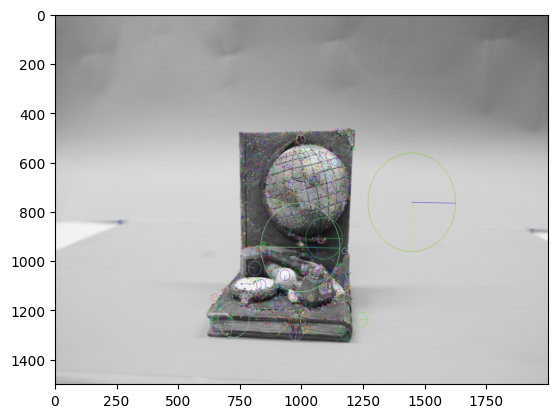

In [ ]:
img_keypoints_sift_imag1 = cv2.drawKeypoints(img1, keypoints_imag1_Sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_ = cv2.resize(img_keypoints_sift_imag1 , (2000 , 1500))
plt.imshow(img_)
plt.show()

#### SIFT_feature_detector_image2

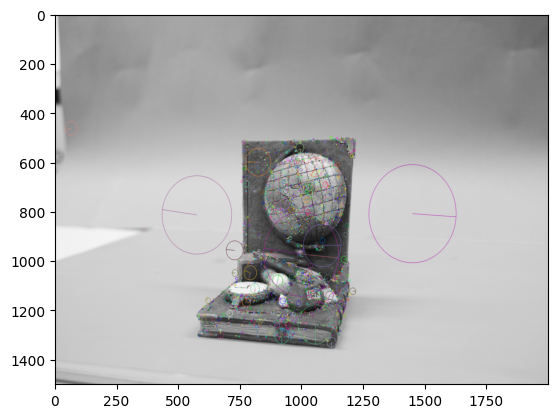

In [ ]:
img_keypoints_sift_imag1 = cv2.drawKeypoints(img2, keypoints_imag2_Sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_ = cv2.resize(img_keypoints_sift_imag1 , (2000 , 1500))
plt.imshow(img_)
plt.show()

#### ORB_feature_detector_image1

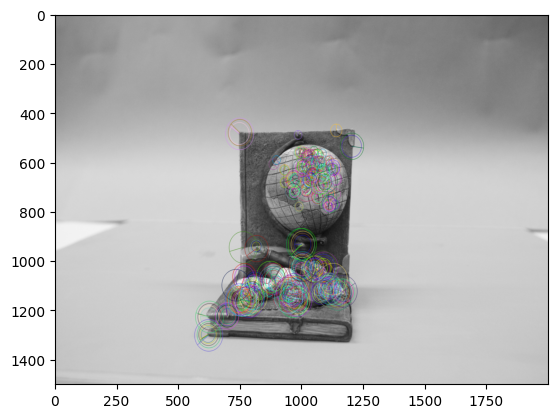

In [ ]:
img_keypoints_ORB_imag1 = cv2.drawKeypoints(img1, keypoints_imag1_ORB, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_ = cv2.resize(img_keypoints_ORB_imag1 , (2000 , 1500))
plt.imshow(img_)
plt.show()

#### ORB_feature_detector_image2

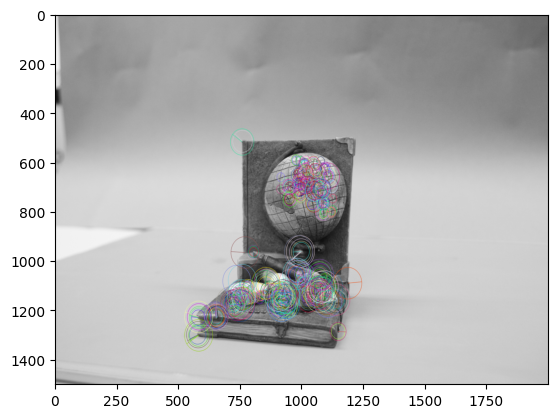

In [ ]:
img_keypoints_ORB_imag2 = cv2.drawKeypoints(img2, keypoints_imag2_ORB, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_ = cv2.resize(img_keypoints_ORB_imag2 , (2000 , 1500))
plt.imshow(img_)
plt.show()

#### Correspondence Matching in SIFT

<Figure size 640x500000 with 0 Axes>

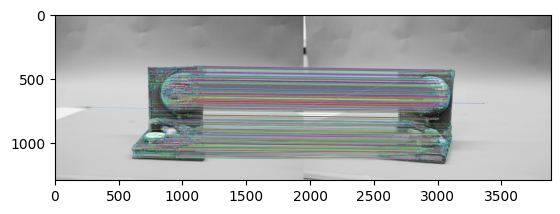

In [ ]:
Indexing_parameters_SIFT = dict(algorithm=0, trees=50)
search_params_SIFT = dict(checks=150)   # or pass empty dictionary
  
flann_SIFT = cv2.FlannBasedMatcher(Indexing_parameters_SIFT, search_params_SIFT)
  
Matches_SIFT = flann_SIFT.knnMatch(Descriptor_sift_im1, Descriptor_sift_im2, k=2)
  
# Need to draw only good matches, so create a mask
good_matches_SIFT = [[0, 0] for i in range(len(Matches_SIFT))]
  
# Good matches
for i, (m, n) in enumerate(Matches_SIFT):
    if m.distance < 0.75*n.distance:
        good_matches_SIFT[i] = [1, 0]
  
  
# Draw the matches using drawMatchesKnn()
Matched_points_SIFT = cv2.drawMatchesKnn(img1,
                             keypoints_imag1_Sift,
                             img2,
                             keypoints_imag2_Sift,
                             Matches_SIFT,
                             outImg=None,
                             matchColor = None,
                             singlePointColor=(0, 255, 255),
                             matchesMask=good_matches_SIFT,
                             flags=0
                             )
  
# Displaying the image
cv2.resize(Matched_points_SIFT , (2000 , 2000))
plt.figure().set_figheight(5000)
plt.figure().set_figheight(500)

plt.imshow(Matched_points_SIFT)
plt.show()

<Figure size 640x500000 with 0 Axes>

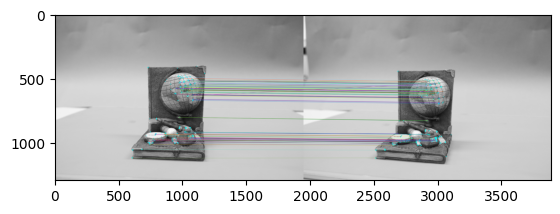

In [ ]:
Indexing_parameters_ORB = dict(algorithm=0, trees=70)
search_params_ORB = dict(checks=150)   # or pass empty dictionary
  
flann_ORB = cv2.FlannBasedMatcher(Indexing_parameters_ORB, search_params_ORB)
  
# Matches_ORB = flann_ORB.knnMatch(Descriptor_ORB_im1, Descriptor_ORB_im2, k=2)
  
# Need to draw only good matches, so create a mask
good_matches_ORB = [[0, 0] for i in range(len(matches_ORB_model))]
  
# Good matches
for i, (m, n) in enumerate(matches_ORB_model):
    if m.distance < 0.75*n.distance:
        good_matches_ORB[i] = [1, 0]
  
  
# Draw the matches using drawMatchesKnn()
Matched_points_ORB = cv2.drawMatchesKnn(img1,
                             keypoints_imag1_ORB,
                             img2,
                             keypoints_imag2_ORB,
                             matches_ORB_model,
                             outImg=None,
                             matchColor = None,
                             singlePointColor=(0, 255, 255),
                             matchesMask=good_matches_ORB,
                             flags=0
                             )
  
# Displaying the image
cv2.resize(Matched_points_ORB , (2000 , 2000))
plt.figure().set_figheight(5000)
plt.figure().set_figheight(500)

plt.imshow(Matched_points_ORB)
plt.show()

### Essentinal Matrix Computation Method

In [ ]:
def computeEssentialMatrix(points1, points2, camera_matrix):
    # Normalize image coordinates
    Essetnial_matrix_check_fit, Intelier = cv2.findEssentialMat(points1, points2, camera_matrix)
    if(Essetnial_matrix_check_fit.all() != None):
        return Essetnial_matrix_check_fit;
    key_points1_norm = np.linalg.inv(camera_matrix) @ np.hstack((points1, np.ones((points1.shape[0],1)))).T
    key_points1_norm /= np.linalg.norm(key_points1_norm, axis=0)
    key_points2_norm = np.linalg.inv(camera_matrix) @ np.hstack((points2, np.ones((points2.shape[0],1)))).T
    key_points2_norm /= np.linalg.norm(key_points2_norm, axis=0)
    print(key_points1_norm.shape , key_points2_norm.shape)
    print(key_points1_norm)
    print(key_points2_norm)
    # Compute the fundamental matrix
    A = np.vstack((key_points1_norm.T * key_points2_norm, key_points1_norm.T * key_points2_norm, key_points1_norm.T)).T
    _, _, v = np.linalg.svd(A)
    F = v[-1,:].reshape(3,3)

    # Enforce rank-2 constraint on fundamental matrix
    u, s, v = np.linalg.svd(F)
    s[2] = 0
    F = u @ np.diag(s) @ v

    # Compute essential matrix
    E_ = camera_matrix.T @ F @ camera_matrix
    return E

#### Pixel Coordinates extraction

In [ ]:
def pixel_coordinates_extractor(keypoints_imag1 , keypoints_imag2 , Corr_Id):
    Pixel_point1 = np.float32([keypoints_imag1[elem.queryIdx].pt for elem in Corr_Id]).reshape(-1 , 1 , 2)
    Pixel_point2 = np.float32([keypoints_imag2[elem.trainIdx].pt for elem in Corr_Id]).reshape(-1 , 1 , 2)
    return Pixel_point1 , Pixel_point2

In [ ]:
def flatten_matrix(pts1):   
    mat = np.zeros((1272 , 2))
    for i in range(len(pts1)):
        mat[i][0] = pts1[i][0][0]
        mat[i][1] = pts1[i][0][1]
    return mat
# flatten_pts1 = flatten_matrix(pts1)
# flatten_pts2 = flatten_matrix(pts2)


In [ ]:
# Extracting  pixel coordinates of correspondences
Pixel_point_sift_imag1 , Pixel_point_sift_imag2 = pixel_coordinates_extractor(keypoints_imag1_Sift , keypoints_imag2_Sift , Sift_correspondences)
Pixel_point_ORB_imag1 , Pixel_point_ORB_imag2 = pixel_coordinates_extractor(keypoints_imag1_ORB , keypoints_imag2_ORB , ORB_correspondences)

## essential Matrix Computation
Essential_matrix_Sift_feature = computeEssentialMatrix(Pixel_point_sift_imag1 ,Pixel_point_sift_imag2 , Intrinsic_camera_matrix)
Essential_matrix_ORB_feature = computeEssentialMatrix(Pixel_point_ORB_imag1 , Pixel_point_ORB_imag2 , Intrinsic_camera_matrix)
print(Essential_matrix_Sift_feature)
print("\n")
print(Essential_matrix_ORB_feature)
print(Pixel_point_sift_imag1 , Pixel_point_sift_imag2)
print(Pixel_point_ORB_imag1 , Pixel_point_ORB_imag2)
print("Shapes of the Pixel points of image1 and Image 2 respectively(SIFT_feature)  : ",Pixel_point_sift_imag1.shape , Pixel_point_sift_imag2.shape)
print("Shapes of the Pixel points of image1 and Image 2 respectively(ORB_feature)  : ",Pixel_point_ORB_imag1.shape , Pixel_point_ORB_imag2.shape)

[[-0.00757833  0.12840393  0.09556399]
 [-0.06482389  0.02040652 -0.69775494]
 [-0.08552341  0.68950089  0.01078301]]


[[ 0.01432569 -0.11319563 -0.12980625]
 [ 0.03097322 -0.02756708  0.69450243]
 [ 0.11640156 -0.68731958 -0.01101947]]
[[[ 255.84688  729.1963 ]]

 [[ 599.54486 1055.0251 ]]

 [[ 605.5388  1068.8964 ]]

 ...

 [[1173.8253   413.9116 ]]

 [[1177.1371   470.41556]]

 [[1406.3875   659.2984 ]]] [[[ 350.19806  755.10004]]

 [[ 560.20734 1056.4625 ]]

 [[ 566.7949  1070.046  ]]

 ...

 [[1170.697    443.39108]]

 [[1180.1462   502.00748]]

 [[1409.321    698.9083 ]]]
[[[1012.       580.     ]]

 [[ 942.       580.     ]]

 [[ 950.       579.     ]]

 [[1013.       578.     ]]

 [[1048.       516.     ]]

 [[1081.       674.     ]]

 [[1021.       921.     ]]

 [[1014.       921.     ]]

 [[1073.       590.     ]]

 [[1013.       525.     ]]

 [[ 985.       571.     ]]

 [[1069.       597.     ]]

 [[ 979.       530.     ]]

 [[ 978.       568.     ]]

 [[ 806.       980.   

### Decomposition of Essential Matrix for the SIFT and ORB Features

In [ ]:
# Computation of the QR Decomsposition of the Essential Matrix
Img_eePoints_SIFT ,  Camera_Rotation_matrix_SIFT, Camera_translation_matrix_SIFT, Inteliers_SIFT = cv2.recoverPose(Essential_matrix_Sift_feature, Pixel_point_sift_imag1, Pixel_point_sift_imag2, Intrinsic_camera_matrix)
Img_eePoints_ORB , Camera_Rotation_matrix_ORB , Camera_translation_matrix_ORB , Inteliers_ORB = cv2.recoverPose(Essential_matrix_ORB_feature , Pixel_point_ORB_imag1 , Pixel_point_ORB_imag2 , Intrinsic_camera_matrix)
if (Img_eePoints_SIFT == None):
    print("Decomposition exception acquired  in SIFT")
    exit()
if (Img_eePoints_ORB == None):
    print("Decomposition exception acquired in ORB")
# output Rotation and translation matrices after the decomposition of the matrices.    
print(Camera_Rotation_matrix_SIFT ,"\n","\n", Camera_translation_matrix_SIFT)
print("\n")
print(Camera_Rotation_matrix_ORB ,"\n","\n", Camera_translation_matrix_ORB)

[[ 0.99541556 -0.01188257  0.09490344]
 [ 0.00922662  0.99955474  0.02837576]
 [-0.09519836 -0.02737003  0.99508198]] 
 
 [[-0.97398411]
 [-0.13053337]
 [ 0.18524576]]


[[ 0.99200548 -0.01773207  0.12494279]
 [ 0.01293737  0.99915223  0.03908265]
 [-0.12552989 -0.03715377  0.99139389]] 
 
 [[-0.96967197]
 [-0.1785894 ]
 [ 0.16685952]]


### Triangulation of 3D points

In [ ]:
def triangulatePoints(proj_mat1, proj_mat2, points1, points2):
    # Convert points to homogeneous coordinates
    P = cv2.triangulatePoints(proj_mat1, proj_mat2, points1,points2)
    if(P.all() != None):
        return P;
    points1_hom = np.hstack([points1, np.ones((points1.shape[0], 1))])
    points2_hom = np.hstack([points2, np.ones((points2.shape[0], 1))])

    # Compute the homogeneous transformation matrix for each camera
    R1 = proj_mat1[:, :3]
    t1 = proj_mat1[:, 3]
    T1 = np.hstack([R1, t1.reshape(3, 1)])
    P1 = np.eye(4)
    P1[:3, :] = T1
    R2 = proj_mat2[:, :3]
    t2 = proj_mat2[:, 3]
    T2 = np.hstack([R2, t2.reshape(3, 1)])
    P2 = np.eye(4)
    P2[:3, :] = T2

    # Triangulate points
    num_points = points1_hom.shape[0]
    triangulated_pts = np.zeros((num_points, 3))
    for i in range(num_points):
        A = np.vstack([points1_hom[i], points2_hom[i]])
        W, _, V = np.linalg.svd(A)
        X_hom = V[-1, :]
        X_hom /= X_hom[3]
        X = X_hom[:3]
        triangulated_pts[i] = X

    return triangulated_pts


#### 3D points Mapping via Pixel coordinates and camera orientation Triangulation Therorem

In [ ]:

Rotation_Identity_matrix = np.eye(4)
Rotation_Identity_matrix[3][3] = 0
Rotation_Identity_matrix = Rotation_Identity_matrix[:3 , :]
# Id_matrix = np.stack((Id_matrix , t_vec))
## for the first camera rotation translation matrices are I and 0 matrix respectively.
Rotated_translatory_matrix_SIFT_feature = np.hstack((Camera_Rotation_matrix_SIFT,Camera_translation_matrix_SIFT))
Rotated_translatory_matrix_ORB_feature = np.hstack((Camera_Rotation_matrix_ORB,Camera_translation_matrix_ORB))

P_3dPoints_SIFT_feature_extractor = triangulatePoints(Rotation_Identity_matrix , Rotated_translatory_matrix_SIFT_feature , Pixel_point_sift_imag1 , Pixel_point_sift_imag2)
P_3dPoints_ORB_feature_extractor = triangulatePoints(Rotation_Identity_matrix , Rotated_translatory_matrix_ORB_feature , Pixel_point_ORB_imag1 , Pixel_point_ORB_imag2)

# In order to normalize the points in the 3d plane we need to make the all the coordinates divided by the third coordinate p = p/p[3]
P_3dPoints_SIFT_feature_extractor = P_3dPoints_SIFT_feature_extractor / P_3dPoints_SIFT_feature_extractor[3]
P_3dPoints_ORB_feature_extractor = P_3dPoints_ORB_feature_extractor / P_3dPoints_ORB_feature_extractor[3]

print(Rotated_translatory_matrix_SIFT_feature ,"\n","\n", Rotated_translatory_matrix_ORB_feature)
print("\n")
print(P_3dPoints_SIFT_feature_extractor ,"\n","\n", P_3dPoints_ORB_feature_extractor)
print("\n")
print(P_3dPoints_SIFT_feature_extractor.shape , P_3dPoints_ORB_feature_extractor.shape)

[[ 0.99541556 -0.01188257  0.09490344 -0.97398411]
 [ 0.00922662  0.99955474  0.02837576 -0.13053337]
 [-0.09519836 -0.02737003  0.99508198  0.18524576]] 
 
 [[ 0.99200548 -0.01773207  0.12494279 -0.96967197]
 [ 0.01293737  0.99915223  0.03908265 -0.1785894 ]
 [-0.12552989 -0.03715377  0.99139389  0.16685952]]


[[1.3014356e+00 1.4241210e+00 1.4232554e+00 ... 1.8018502e+00
  1.7858362e+00 1.7615552e+00]
 [2.2717941e+00 1.8314029e+00 1.8342013e+00 ... 5.2929544e-01
  5.8436126e-01 6.6337049e-01]
 [3.3356480e-03 1.8930814e-03 1.8711928e-03 ... 1.5067469e-03
  1.4793325e-03 1.2082362e-03]
 [1.0000000e+00 1.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0000000e+00]] 
 
 [[1.1909398e+00 1.1834239e+00 1.1845342e+00 1.1912988e+00 1.2060223e+00
  1.1814338e+00 1.1324747e+00 1.1314408e+00 1.1950358e+00 1.2012560e+00
  1.1898530e+00 1.1934446e+00 1.1970673e+00 1.1896806e+00 1.0833751e+00
  1.1830916e+00 1.2059479e+00 1.2051119e+00 1.1963143e+00 1.1747341e+00
  1.2045070e+00 1.078

### Plotting the 3D-Points(Pi) and Camera center (T)

#### ORB features 3D points Plot

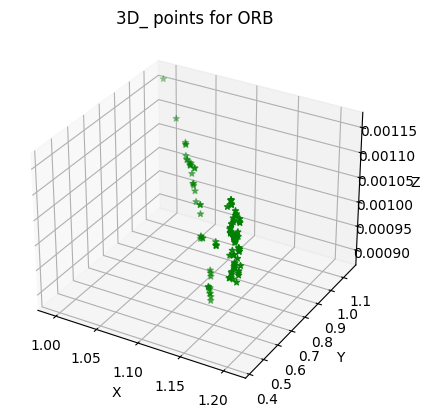

In [ ]:
# Plot 3D points and camera center
_3d_graph_plot = plt.figure()
_3d_marker= _3d_graph_plot.add_subplot(projection='3d')
# camera_center = graph.add_subplot(projection = '3d')
_3d_marker.scatter(P_3dPoints_ORB_feature_extractor[0], P_3dPoints_ORB_feature_extractor[1], P_3dPoints_ORB_feature_extractor[2], c='Green', marker='*')
_3d_marker.set_xlabel('X')
_3d_marker.set_ylabel('Y')
_3d_marker.set_zlabel('Z')
plt.title('3D_ points for ORB')

plt.show()

Text(0.5, 0.92, 'Camera_center with the 3d points ORB')

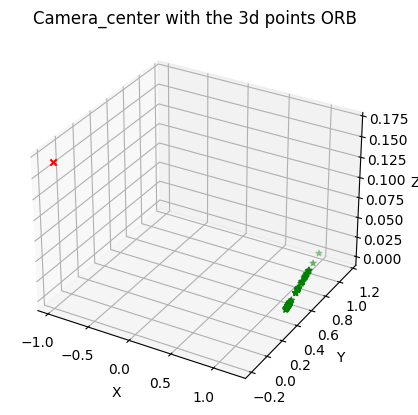

In [ ]:
# Plot 3D points and camera center
camera_center_plot = plt.figure()
camera_center = camera_center_plot.add_subplot(projection = '3d')
camera_center.scatter(P_3dPoints_ORB_feature_extractor[0], P_3dPoints_ORB_feature_extractor[1], P_3dPoints_ORB_feature_extractor[2], c='Green', marker='*')
camera_center.scatter(Camera_translation_matrix_ORB[0], Camera_translation_matrix_ORB[1], Camera_translation_matrix_ORB[2], c='red', marker='x')
#the Red cross in the Graph is the camera center 

camera_center.set_xlabel('X')
camera_center.set_ylabel('Y')
camera_center.set_zlabel('Z')
plt.title('Camera_center with the 3d points ORB')


#### SIFT features 3D points Plot

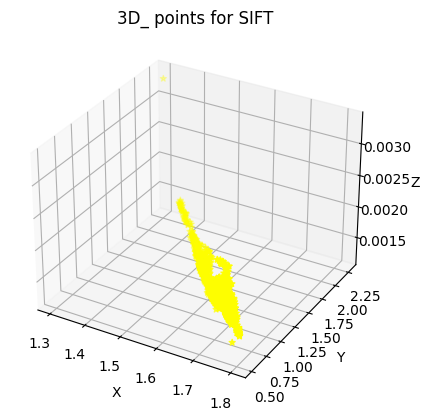

In [ ]:
# Plot 3D points and camera center
_3d_graph_plot = plt.figure()
_3d_marker= _3d_graph_plot.add_subplot(projection='3d')
# camera_center = graph.add_subplot(projection = '3d')
_3d_marker.scatter(P_3dPoints_SIFT_feature_extractor[0], P_3dPoints_SIFT_feature_extractor[1], P_3dPoints_SIFT_feature_extractor[2], c='Yellow', marker='*')
_3d_marker.set_xlabel('X')
_3d_marker.set_ylabel('Y')
_3d_marker.set_zlabel('Z')
plt.title('3D_ points for SIFT')

plt.show()

Text(0.5, 0.92, 'Camera_center with the 3d points SIFT')

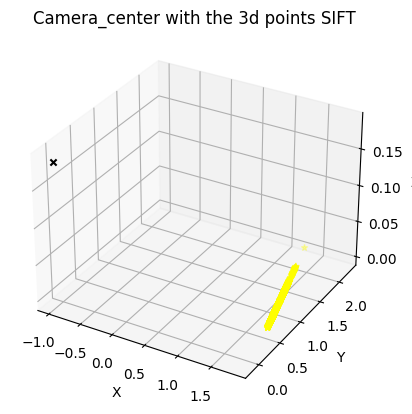

In [ ]:
# Plot 3D points and camera center
camera_center_plot = plt.figure()
camera_center = camera_center_plot.add_subplot(projection = '3d')
camera_center.scatter(P_3dPoints_SIFT_feature_extractor[0], P_3dPoints_SIFT_feature_extractor[1], P_3dPoints_SIFT_feature_extractor[2], c='Yellow', marker='*')
camera_center.scatter(Camera_translation_matrix_SIFT[0], Camera_translation_matrix_SIFT[1], Camera_translation_matrix_SIFT[2], c='Black', marker='x')
#the Red cross in the Graph is the camera center 

camera_center.set_xlabel('X')
camera_center.set_ylabel('Y')
camera_center.set_zlabel('Z')
plt.title('Camera_center with the 3d points SIFT')
